## Importing Library :

In [1]:
#Import necassary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import json
import seaborn as sns
from os import listdir
import re
from tqdm import tqdm
import string
import nltk
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
stop = stopwords.words('english')
import warnings
warnings.filterwarnings("ignore")

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3]:
tf.__version__

'2.9.2'

## Preprocessing Approach towards VQA Data :

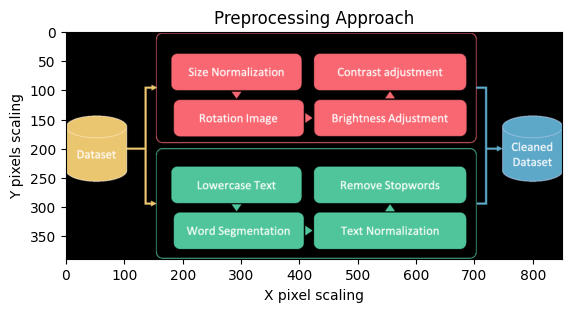

In [4]:
plt.title("Preprocessing Approach")
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")
 
image = mpimg.imread("/Users/prateeksha/Desktop/The-overview-of-data-preprocessing-process.pbm")
plt.imshow(image)
plt.show()

## Download Questions and Annotations : Training

In [5]:
def download_vqa():
    os.system('wget https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/v2_Questions_Train_mscoco.zip -P zip/')
    
     # Download the VQA Annotations
    os.system('wget https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/v2_Annotations_Train_mscoco.zip -P zip/')
    
      # Unzip the annotations
    os.system('unzip zip/v2_Questions_Train_mscoco.zip -d annotations/')
    os.system('unzip zip/v2_Annotations_Train_mscoco.zip -d annotations/')

In [6]:
#download_vqa()

## Download Images : Training

In [7]:
def download_images():
    os.system('wget http://images.cocodataset.org/zips/train2014.zip -P coco_images/')

    # Unzip the coco_images
    os.system('unzip coco_images/train2014.zip -d train/')

In [8]:
#download_images()

## Data Preprocessing & Transformation :

In [9]:
train_questions = json.load(open('annotations/v2_OpenEnded_mscoco_train2014_questions.json', 'r'))
train_answers = json.load(open('annotations/v2_mscoco_train2014_annotations.json', 'r'))
train_img_path = ("/Users/prateeksha/train/train2014/")
train_images= listdir(train_img_path)

print("Total no. of training question are",len(train_questions['questions']))
print("Total no. of training answers are",len(train_answers['annotations']))
print("Total no. of training images are",len(train_images))

Total no. of training question are 443757
Total no. of training answers are 443757
Total no. of training images are 82783


In [10]:
train_questions_df = pd.json_normalize(train_questions['questions'])
train_questions_df.head()

image_id                                     question  question_id
0    458752    What is this photo taken looking through?    458752000
1    458752           What position is this man playing?    458752001
2    458752             What color is the players shirt?    458752002
3    458752  Is this man a professional baseball player?    458752003
4    262146                      What color is the snow?    262146000

In [11]:
train_answers_df = pd.json_normalize(train_answers['annotations'])
train_answers_df.head()

question_type multiple_choice_answer  \
0       what is this                    net   
1               what                pitcher   
2  what color is the                 orange   
3            is this                    yes   
4  what color is the                  white   

                                             answers  image_id answer_type  \
0  [{'answer': 'net', 'answer_confidence': 'maybe...    458752       other   
1  [{'answer': 'pitcher', 'answer_confidence': 'y...    458752       other   
2  [{'answer': 'orange', 'answer_confidence': 'ye...    458752       other   
3  [{'answer': 'yes', 'answer_confidence': 'yes',...    458752      yes/no   
4  [{'answer': 'white', 'answer_confidence': 'yes...    262146       other   

   question_id  
0    458752000  
1    458752001  
2    458752002  
3    458752003  
4    262146000

In [12]:
train_answers_df = train_answers_df.drop(['answers'], axis=1)

In [13]:
train_answers_df

question_type    multiple_choice_answer  image_id answer_type  \
0            what is this                       net    458752       other   
1                    what                   pitcher    458752       other   
2       what color is the                    orange    458752       other   
3                 is this                       yes    458752      yes/no   
4       what color is the                     white    262146       other   
...                   ...                       ...       ...         ...   
443752  what color is the                     black    524286       other   
443753         is there a                        no    524286      yes/no   
443754  what color is the                     black    524286       other   
443755                why  one is easier to type on    524286       other   
443756          is that a                       yes    524286      yes/no   

        question_id  
0         458752000  
1         458752001  
2         458752002  
3         458752003  
4         262146000  
...             ...  
443752    524286001  
443753    524286002  
443754    524286003  
443755    524286004  
443756    524286005  

[443757 rows x 5 columns]

In [14]:
training_data = pd.merge(train_questions_df,train_answers_df,  how='inner', left_on=['image_id','question_id'], right_on = ['image_id','question_id'])
display(training_data)

image_id                                     question  question_id  \
0         458752    What is this photo taken looking through?    458752000   
1         458752           What position is this man playing?    458752001   
2         458752             What color is the players shirt?    458752002   
3         458752  Is this man a professional baseball player?    458752003   
4         262146                      What color is the snow?    262146000   
...          ...                                          ...          ...   
443752    524286                  What color is the keyboard?    524286001   
443753    524286       Is there a computer mouse on the desk?    524286002   
443754    524286                  What color is the computer?    524286003   
443755    524286                 Why are there two keyboards?    524286004   
443756    524286                            Is that a laptop?    524286005   

            question_type    multiple_choice_answer answer_type  
0            what is this                       net       other  
1                    what                   pitcher       other  
2       what color is the                    orange       other  
3                 is this                       yes      yes/no  
4       what color is the                     white       other  
...                   ...                       ...         ...  
443752  what color is the                     black       other  
443753         is there a                        no      yes/no  
443754  what color is the                     black       other  
443755                why  one is easier to type on       other  
443756          is that a                       yes      yes/no  

[443757 rows x 6 columns]

In [15]:
import pywedge as pw
train_visual = pw.Pywedge_Charts(training_data, c=None, y="image_id" )
# For Visualization
chart = train_visual.make_charts()

HTML(value='<h2>Pywedge Make_Charts </h2>')

In [16]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443757 entries, 0 to 443756
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   image_id                443757 non-null  int64 
 1   question                443757 non-null  object
 2   question_id             443757 non-null  int64 
 3   question_type           443757 non-null  object
 4   multiple_choice_answer  443757 non-null  object
 5   answer_type             443757 non-null  object
dtypes: int64(2), object(4)
memory usage: 23.7+ MB


In [17]:
#Check the data columns
training_data.columns

Index(['image_id', 'question', 'question_id', 'question_type',
       'multiple_choice_answer', 'answer_type'],
      dtype='object')

In [18]:
#Check the data shape of the dataset
training_data.shape

(443757, 6)

In [19]:
#Check the null values in the dataset
training_data.isna().sum()

image_id                  0
question                  0
question_id               0
question_type             0
multiple_choice_answer    0
answer_type               0
dtype: int64

In [20]:
print("Total unique Question in Training Data : ",len(training_data.question_type.unique()))

Total unique Question in Training Data :  65


In [21]:
training_data.answer_type.value_counts()

other     219269
yes/no    166882
number     57606
Name: answer_type, dtype: int64

In [22]:
print("Total unique Question in Training Data : ",len(training_data.answer_type.unique()))

Total unique Question in Training Data :  3


### Preprocessing - Question 

Max questions on a image 275
Min questions on a image 3
Mean questions on a image 5.3604846405663


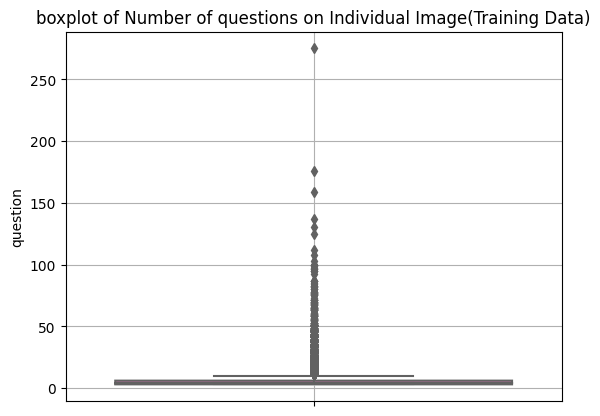

In [23]:
aggregate = {'question': 'count'}
train_bplot = pd.DataFrame(training_data.groupby(['image_id'],as_index=False).agg(aggregate))
train_img_que = train_bplot['question'].values
print("Max questions on a image",max(train_img_que))
print("Min questions on a image",min(train_img_que))
print("Mean questions on a image",np.mean(train_img_que))

ax = sns.boxplot(y = 'question', data = train_bplot,notch= True,palette="PuRd")
plt.title("boxplot of Number of questions on Individual Image(Training Data)")
plt.grid()
plt.show()

In [24]:
training_data["question"] = training_data["question"].str.lower()
training_data.head(2)

image_id                                   question  question_id  \
0    458752  what is this photo taken looking through?    458752000   
1    458752         what position is this man playing?    458752001   

  question_type multiple_choice_answer answer_type  
0  what is this                    net       other  
1          what                pitcher       other

In [25]:
punctuations = []

length = int(len(training_data))
for i in range(length):
    punctuations.append(re.findall(r"[^a-zA-Z0-9 ]", training_data["question"][i]))
    
    myset = set()
for i in range(length):
    for j in range(len(punctuations[i])):
        myset.add(punctuations[i][j])
print(myset)

{':', '*', ',', '$', '`', '+', "'", ';', '&', ')', '.', '-', '^', '#', '/', '_', '(', '"', '%', '!', '?'}


In [26]:
training_data['question'] = training_data['question'].str.replace(r'[^\w\s]+', '')

training_data.head()

image_id                                    question  question_id  \
0    458752    what is this photo taken looking through    458752000   
1    458752           what position is this man playing    458752001   
2    458752             what color is the players shirt    458752002   
3    458752  is this man a professional baseball player    458752003   
4    262146                      what color is the snow    262146000   

       question_type multiple_choice_answer answer_type  
0       what is this                    net       other  
1               what                pitcher       other  
2  what color is the                 orange       other  
3            is this                    yes      yes/no  
4  what color is the                  white       other

In [27]:
with open('punctuations.txt', 'w') as f:
    print(myset, file=f)

In [28]:
prepro_train_data = []

def decontracted(phrase):
 
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

for question1 in tqdm(training_data['question'].values):
    tr_q = decontracted(question1)
    prepro_train_data.append(tr_q.lower().strip())
training_data['question']= prepro_train_data

100%|███████████████████████████████| 443757/443757 [00:01<00:00, 309230.38it/s]


In [29]:
question_token = []

def tokenize(quest): 
    token = re.split('\W+', quest)
    return token
training_data['que_tokenize'] = training_data['question'].apply(lambda x: tokenize(x))
training_data.head()

image_id                                    question  question_id  \
0    458752    what is this photo taken looking through    458752000   
1    458752           what position is this man playing    458752001   
2    458752             what color is the players shirt    458752002   
3    458752  is this man a professional baseball player    458752003   
4    262146                      what color is the snow    262146000   

       question_type multiple_choice_answer answer_type  \
0       what is this                    net       other   
1               what                pitcher       other   
2  what color is the                 orange       other   
3            is this                    yes      yes/no   
4  what color is the                  white       other   

                                        que_tokenize  
0   [what, is, this, photo, taken, looking, through]  
1           [what, position, is, this, man, playing]  
2             [what, color, is, the, players, shirt]  
3  [is, this, man, a, professional, baseball, pla...  
4                       [what, color, is, the, snow]

In [30]:
training_data['que_without_stopwords'] = training_data['question'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
training_data.head()

image_id                                    question  question_id  \
0    458752    what is this photo taken looking through    458752000   
1    458752           what position is this man playing    458752001   
2    458752             what color is the players shirt    458752002   
3    458752  is this man a professional baseball player    458752003   
4    262146                      what color is the snow    262146000   

       question_type multiple_choice_answer answer_type  \
0       what is this                    net       other   
1               what                pitcher       other   
2  what color is the                 orange       other   
3            is this                    yes      yes/no   
4  what color is the                  white       other   

                                        que_tokenize  \
0   [what, is, this, photo, taken, looking, through]   
1           [what, position, is, this, man, playing]   
2             [what, color, is, the, players, shirt]   
3  [is, this, man, a, professional, baseball, pla...   
4                       [what, color, is, the, snow]   

              que_without_stopwords  
0               photo taken looking  
1              position man playing  
2               color players shirt  
3  man professional baseball player  
4                        color snow

In [31]:
from nltk.stem import SnowballStemmer 

Snowstem = SnowballStemmer('english')

for w in training_data.que_without_stopwords: 
    print(w, " : ", Snowstem.stem(w)) 
    
training_data['que_stem'] = training_data.que_without_stopwords.apply(Snowstem.stem)

photo taken looking  :  photo taken look
position man playing  :  position man play
color players shirt  :  color players shirt
man professional baseball player  :  man professional baseball play
color snow  :  color snow
person  :  person
color persons headwear  :  color persons headwear
persons hand  :  persons hand
dog waiting  :  dog wait
dog looking tennis ball frisbee  :  dog looking tennis ball frisbe
sky blue  :  sky blu
snow mountains  :  snow mountain
white streak  :  white streak
window open  :  window open
color toothbrush  :  color toothbrush
child  :  child
brushing  :  brush
man smiling  :  man smil
business man picture  :  business man pictur
tie pair well suit  :  tie pair well suit
man look happy  :  man look happi
photo color  :  photo color
man wearing plain tie  :  man wearing plain ti
judging dress taken latin american country  :  judging dress taken latin american countri
colors shown picture  :  colors shown pictur
men sidewalk  :  men sidewalk
photo taken recen

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



foggy  :  foggi
boat sailing sunrise  :  boat sailing sunris
seem safe swim river  :  seem safe swim riv
water still  :  water stil
time day  :  time day
background  :  background
fish water  :  fish wat
raining  :  rain
clouds sky  :  clouds ski
sun coming going  :  sun coming go
passenger train  :  passenger train
shadow  :  shadow
fishing boats chartered  :  fishing boats chart
swim  :  swim
dawn dusk  :  dawn dusk
bridge  :  bridg
water look like safe dive  :  water look like safe d
shopping district  :  shopping district
geological formation background  :  geological formation background
sun rising setting  :  sun rising set
sky clear  :  sky clear
tell time  :  tell tim
boats  :  boat
people picture  :  people pictur
people walking across bridge  :  people walking across bridg
patterns placemats  :  patterns placemat
many glasses counter  :  many glasses count
color scheme  :  color schem
light photo  :  light photo
glasses amount liquid  :  glasses amount liquid
kind fruit glass

In [32]:
training_data.head()

image_id                                    question  question_id  \
0    458752    what is this photo taken looking through    458752000   
1    458752           what position is this man playing    458752001   
2    458752             what color is the players shirt    458752002   
3    458752  is this man a professional baseball player    458752003   
4    262146                      what color is the snow    262146000   

       question_type multiple_choice_answer answer_type  \
0       what is this                    net       other   
1               what                pitcher       other   
2  what color is the                 orange       other   
3            is this                    yes      yes/no   
4  what color is the                  white       other   

                                        que_tokenize  \
0   [what, is, this, photo, taken, looking, through]   
1           [what, position, is, this, man, playing]   
2             [what, color, is, the, players, shirt]   
3  [is, this, man, a, professional, baseball, pla...   
4                       [what, color, is, the, snow]   

              que_without_stopwords                        que_stem  
0               photo taken looking                photo taken look  
1              position man playing               position man play  
2               color players shirt             color players shirt  
3  man professional baseball player  man professional baseball play  
4                        color snow                      color snow

In [33]:
from nltk.stem import WordNetLemmatizer
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(w) for w in text.split(' ')])

training_data['que_normalise'] = training_data['que_stem'].apply(lambda x: lemmatize_text(x))
training_data.head()

image_id                                    question  question_id  \
0    458752    what is this photo taken looking through    458752000   
1    458752           what position is this man playing    458752001   
2    458752             what color is the players shirt    458752002   
3    458752  is this man a professional baseball player    458752003   
4    262146                      what color is the snow    262146000   

       question_type multiple_choice_answer answer_type  \
0       what is this                    net       other   
1               what                pitcher       other   
2  what color is the                 orange       other   
3            is this                    yes      yes/no   
4  what color is the                  white       other   

                                        que_tokenize  \
0   [what, is, this, photo, taken, looking, through]   
1           [what, position, is, this, man, playing]   
2             [what, color, is, the, players, shirt]   
3  [is, this, man, a, professional, baseball, pla...   
4                       [what, color, is, the, snow]   

              que_without_stopwords                        que_stem  \
0               photo taken looking                photo taken look   
1              position man playing               position man play   
2               color players shirt             color players shirt   
3  man professional baseball player  man professional baseball play   
4                        color snow                      color snow   

                    que_normalise  
0                photo taken look  
1               position man play  
2              color player shirt  
3  man professional baseball play  
4                      color snow

In [34]:
training_data.drop(['question', 'que_tokenize','que_without_stopwords','que_stem'], axis=1, inplace=True)

In [35]:
training_data = training_data.rename(columns={'que_normalise': 'Question'})
training_data

image_id  question_id      question_type    multiple_choice_answer  \
0         458752    458752000       what is this                       net   
1         458752    458752001               what                   pitcher   
2         458752    458752002  what color is the                    orange   
3         458752    458752003            is this                       yes   
4         262146    262146000  what color is the                     white   
...          ...          ...                ...                       ...   
443752    524286    524286001  what color is the                     black   
443753    524286    524286002         is there a                        no   
443754    524286    524286003  what color is the                     black   
443755    524286    524286004                why  one is easier to type on   
443756    524286    524286005          is that a                       yes   

       answer_type                        Question  
0            other                photo taken look  
1            other               position man play  
2            other              color player shirt  
3           yes/no  man professional baseball play  
4            other                      color snow  
...            ...                             ...  
443752       other                  color keyboard  
443753      yes/no             computer mouse desk  
443754       other                    color comput  
443755       other                    two keyboard  
443756      yes/no                          laptop  

[443757 rows x 6 columns]

In [36]:
training_data = training_data[['question_id', 'image_id','Question','question_type',
                               'multiple_choice_answer','answer_type']]

training_data

question_id  image_id                        Question  \
0         458752000    458752                photo taken look   
1         458752001    458752               position man play   
2         458752002    458752              color player shirt   
3         458752003    458752  man professional baseball play   
4         262146000    262146                      color snow   
...             ...       ...                             ...   
443752    524286001    524286                  color keyboard   
443753    524286002    524286             computer mouse desk   
443754    524286003    524286                    color comput   
443755    524286004    524286                    two keyboard   
443756    524286005    524286                          laptop   

            question_type    multiple_choice_answer answer_type  
0            what is this                       net       other  
1                    what                   pitcher       other  
2       what color is the                    orange       other  
3                 is this                       yes      yes/no  
4       what color is the                     white       other  
...                   ...                       ...         ...  
443752  what color is the                     black       other  
443753         is there a                        no      yes/no  
443754  what color is the                     black       other  
443755                why  one is easier to type on       other  
443756          is that a                       yes      yes/no  

[443757 rows x 6 columns]

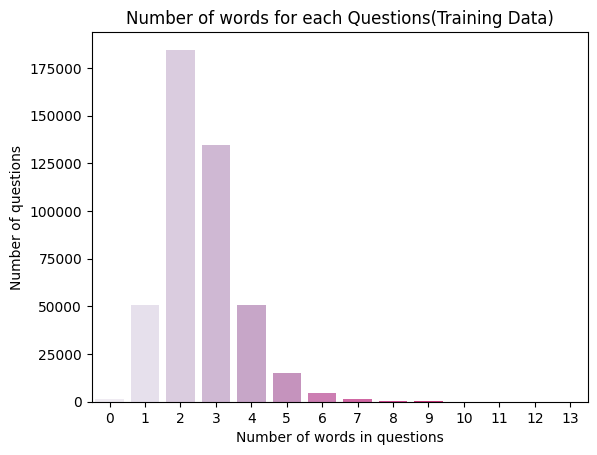

In [37]:
sns.countplot(training_data["Question"].apply(lambda x: len(x.split())).values,palette='PuRd')
plt.title("Number of words for each Questions(Training Data)")
plt.xlabel("Number of words in questions")
plt.ylabel("Number of questions")
plt.show()

In [38]:
from collections import Counter
cnt=Counter()

for text in training_data['Question'].values:
    for word in text.split():
        cnt[word]+=1
        cnt.most_common(10)    

In [39]:
common_que = cnt.most_common()

In [40]:
with open('vocab.txt','w') as data: 
      data.write(str(common_que))

### Preprocessing - Question_Type

In [41]:
from wordcloud import WordCloud

def CountFrequency(training_data,column,isJoin=False):
    train_frequency = {}

    for _row in training_data[column]:
        if isJoin:
            _row = "_".join(_row.split())
        if(train_frequency.get(_row,-1) > 0):
            train_frequency[_row] += 1
        else:
            train_frequency[_row] = 1

    return train_frequency

def Barplot(training_data,column,top=20,isJoin=False):
    train_freq = CountFrequency(training_data,column,isJoin)
    train_freq_sort = sorted(list(train_freq.items()),key = lambda x: x[1],reverse=True)
    train_samp =  len(training_data)
    
    
    plt.plot([x[1]for x in train_freq_sort[:top]],color  = '#7eb54e',linestyle='dashed')
    i=np.arange(top)
    plt.title("Top Frequent : " + str(top) + " " + column )
    plt.xlabel("Questions_Tag")
    plt.ylabel("Counts")
    plt.xticks(i,[x[0] for x in train_freq_sort[:top]])
    plt.xticks(rotation=90)
    plt.show()
    return train_freq_sort

def VisualWordCloud(training_data,column,isJoin=False):
    train_freq = CountFrequency(training_data,column,isJoin)
    #https://www.geeksforgeeks.org/generating-word-cloud-python/
    wordcloud = WordCloud(width = 800, height = 400, 
                    background_color ='black', 
                    stopwords = None, 
                    min_font_size = 10).generate_from_frequencies(train_freq)
    # plot the WordCloud image      
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title("WordCloud : "+ column)  
    plt.grid()
    plt.show()

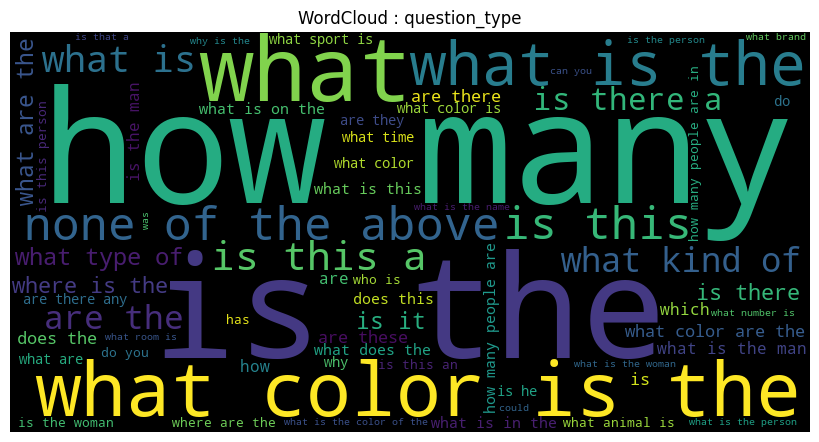

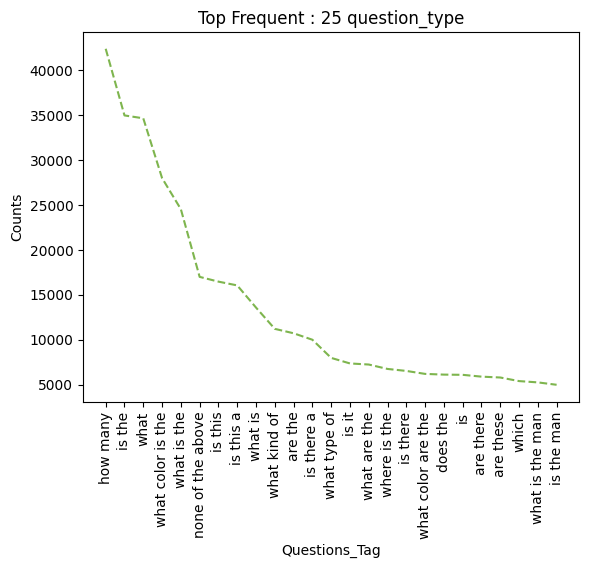

In [42]:
VisualWordCloud(training_data, 'question_type')
frequent_questions = Barplot(training_data, 'question_type', top = 25)

In [43]:
for _type,_count in frequent_questions[:5]:
    print("% '" + _type + "' based questions are", str(100*_count/len(training_data)) )

% 'how many' based questions are 9.541032592161926
% 'is the' based questions are 7.8707490811412555
% 'what' based questions are 7.7988628911769275
% 'what color is the' based questions are 6.301196375493795
% 'what is the' based questions are 5.521490365222408


### Preprocessing - multiple_choice_answer

In [44]:
# Duplicate questions in training data
aggregate = {'question_id':'count', 'multiple_choice_answer': lambda x: " ,  ".join(x)}
max_im = pd.DataFrame(training_data.groupby(['image_id','Question'],as_index=False).agg(aggregate)).rename(columns={'question_id':'count'})
max_im = max_im[max_im['count']>1]
max_im


image_id             Question  count     multiple_choice_answer
3             25              animal       2                 yes ,  yes
160          312      many baby eleph      2                     1 ,  1
238          436              man eat      3      donut ,  toast ,  pie
684         1084        color scissor      2  black ,  black and silver
685         1084  color scissor handl      2             black ,  black
...          ...                  ...    ...                        ...
438941    580932            cat sleep      2                 yes ,  yes
438983    580979          color train      2               blue ,  blue
439202    581223    color zebra strip      2             black ,  black
439205    581223           many zebra      2                     1 ,  1
439662    581909             boat wat      2                   no ,  no

[3770 rows x 4 columns]

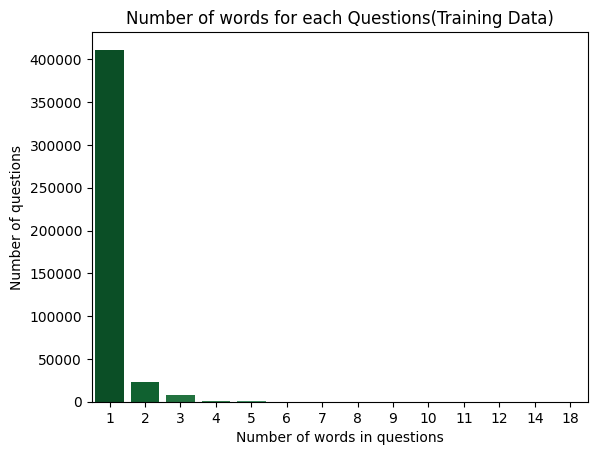

In [45]:
sns.countplot(training_data["multiple_choice_answer"].apply(lambda x: len(x.split())).values,palette='BuGn_r')
plt.title("Number of words for each Questions(Training Data)")
plt.xlabel("Number of words in questions")
plt.ylabel("Number of questions")
plt.show()

In [46]:
frequent_answers = sorted(list(CountFrequency(training_data,'multiple_choice_answer').items()),
                          key = lambda x: x[1],reverse=True)

### Preprocessing - Answer_type

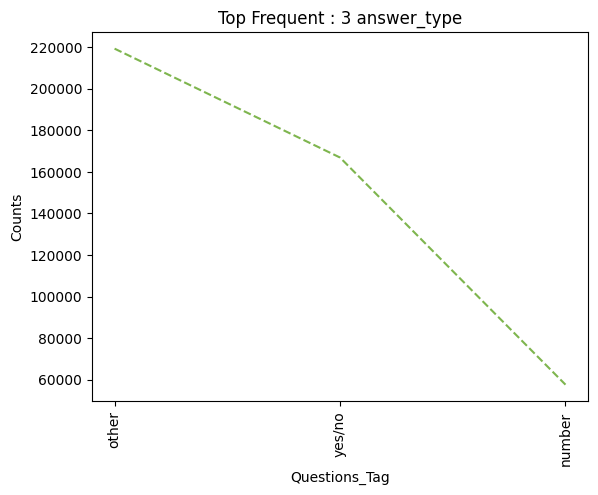

In [47]:
frequent_answer_type = Barplot(training_data, 'answer_type', top = 3)

In [48]:
for _type,_count in frequent_answer_type:
    print("% of '" + _type + "'answers :",str(100*_count/len(training_data)))

% of 'other'answers : 49.41195293820717
% of 'yes/no'answers : 37.60661803644788
% of 'number'answers : 12.981429025344953


In [49]:
temp = training_data
top_questions = [x[0] for x in frequent_questions[:50]]
top_answers = [x[0] for x in frequent_answers[:50]]

aggregations = {'Question': 'count'}
temp = pd.DataFrame(temp.groupby(['question_type','multiple_choice_answer'],as_index=False).agg(aggregations))
temp = temp[temp['Question']>=10]
temp = temp.pivot(index='question_type', columns='multiple_choice_answer', values='Question')

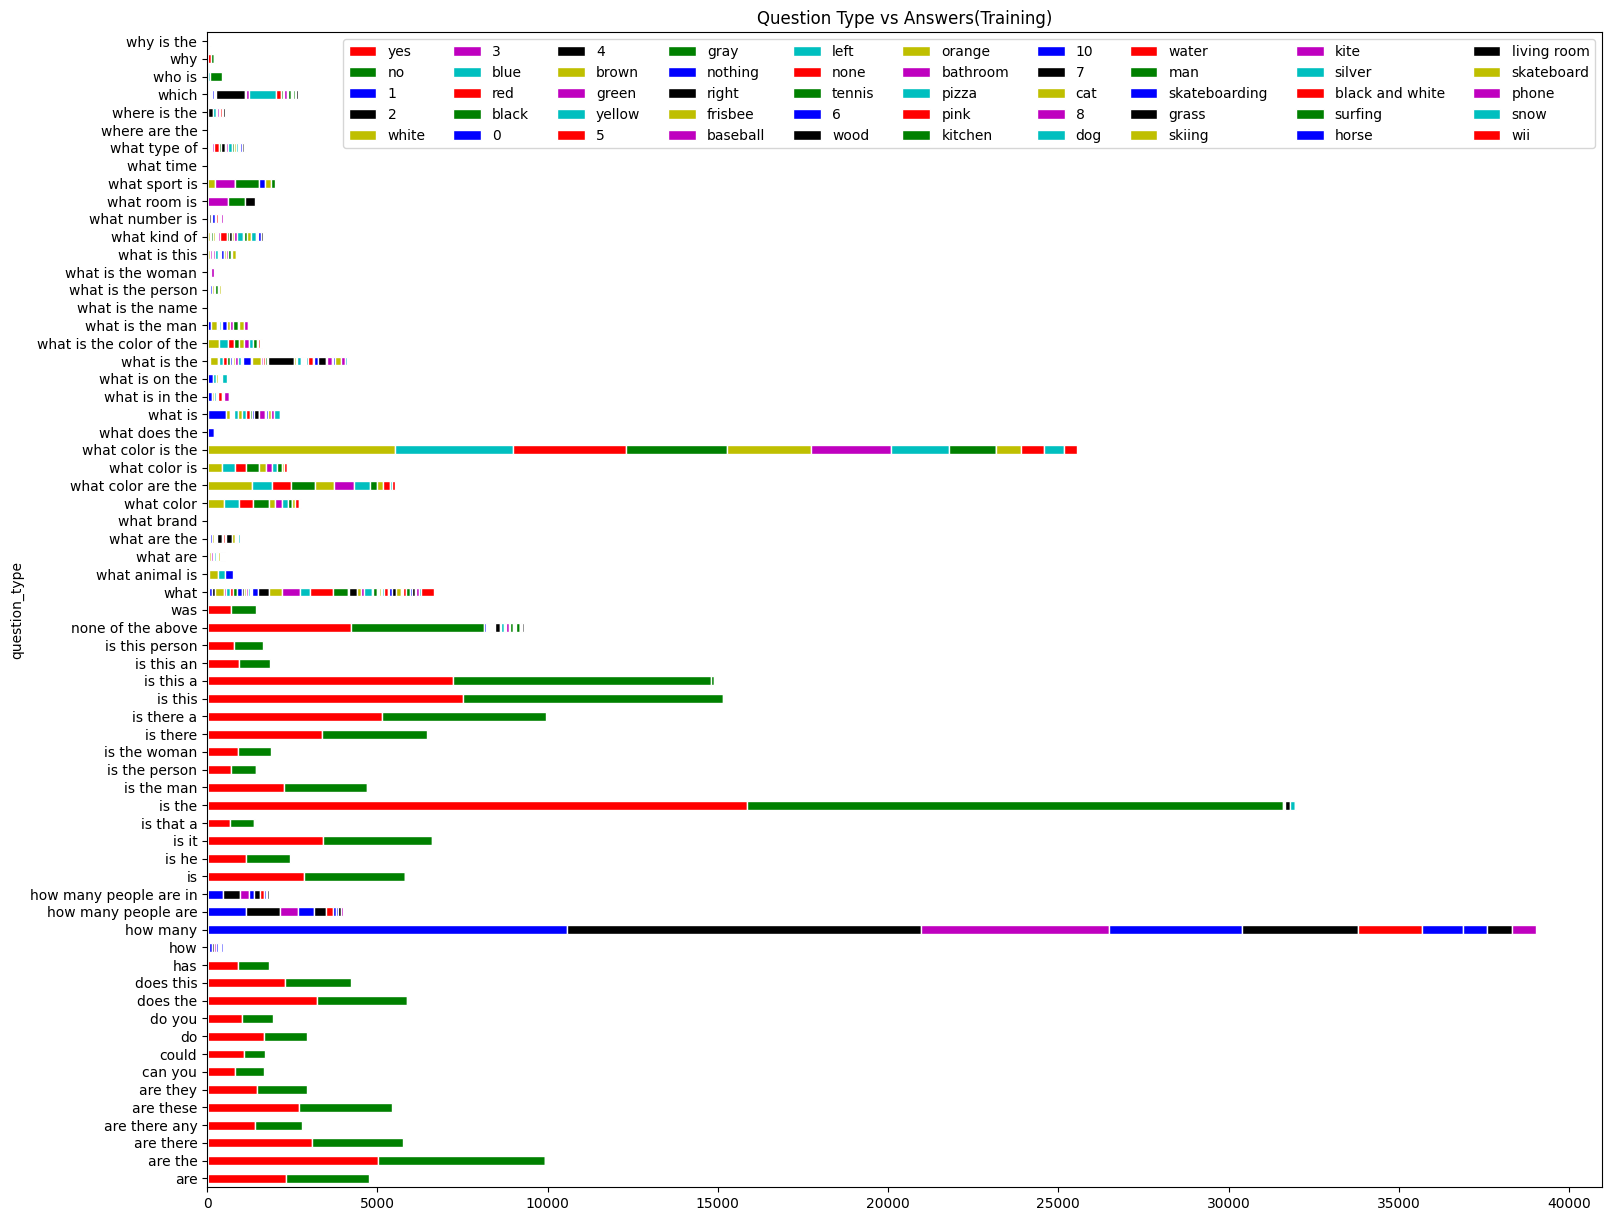

In [50]:
ax = temp.loc[:,top_answers].plot.barh(stacked=True, figsize=(18,15), edgecolor='white',color = "rgbkymc")
ax.legend(ncol = 10)
plt.title('Question Type vs Answers(Training)')
plt.show()

In [51]:
#training_data.to_pickle("clean_train.pkl")

## Preprocessing Images :

In [52]:
import cv2

In [55]:
def showImages(trainpathimages):
    r = np.random.randint(0,len(training_data),3)
    pos=331
    plt.figure(figsize=(20,20))
    j=0
    for i in r:
        train_im = 'COCO_train2014' + '_'+ str(training_data['image_id'][i]).zfill(12) + '.jpg'
        ax = plt.subplot(pos+j)
        train_img = cv2.imread(trainpathimages+train_im)
        train_img = cv2.cvtColor(train_img, cv2.COLOR_BGR2RGB)
        ax.imshow(train_img)
        ax.title.set_text('Question: '+training_data['Question'][i]+'\nAnswer: '+training_data['multiple_choice_answer'][i])
        ax.axis('off')
        j=j+1

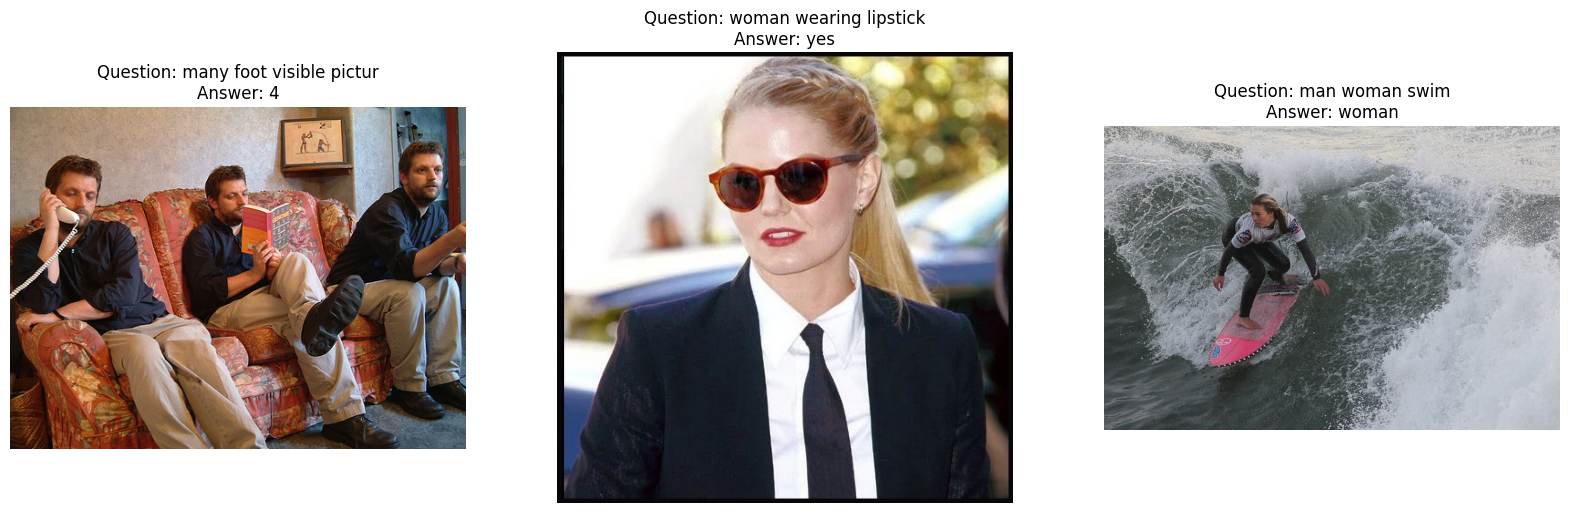

In [56]:
showImages(train_img_path)

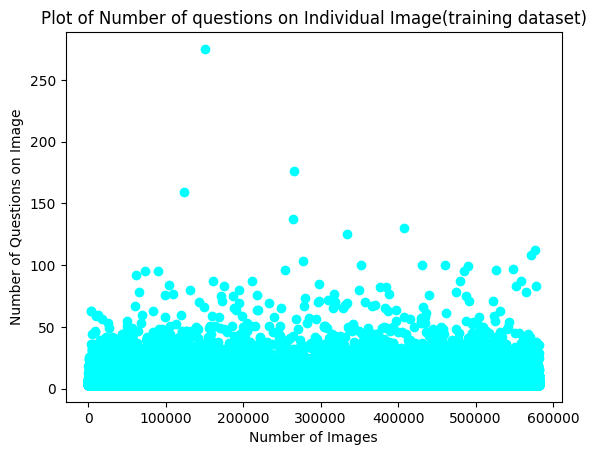

In [57]:
plt.scatter(train_bplot['image_id'],train_bplot['question'],c ="cyan")
plt.xlabel('Number of Images')
plt.ylabel('Number of Questions on Image')
plt.title('Plot of Number of questions on Individual Image(training dataset)')
plt.show() 

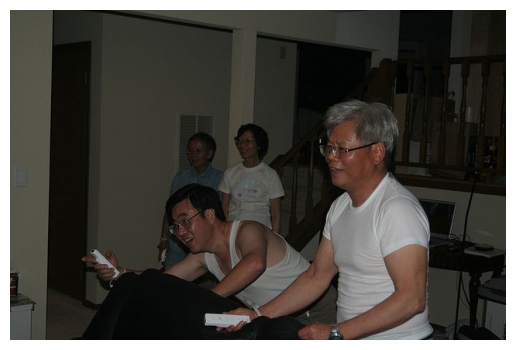

In [58]:
img_maxpath =  train_img_path + 'COCO_train2014_' + '%012d.jpg' % (train_bplot[train_bplot['question'] == 275]['image_id'].values[0])
img_max=cv2.imread(img_maxpath)
img_max = cv2.cvtColor(img_max, cv2.COLOR_BGR2RGB)
imgplot = plt.imshow(img_max)
plt.axis('off')
plt.show()

In [59]:
# Let's check for the image_id.
image_id = "131074" # Lst six digit of each image name.
training_data.loc[training_data["image_id"] == 131074 ]

question_id  image_id                                           Question  \
35    131074000    131074                                             pillow   
36    131074001    131074  many piece furniture used sleeping featured pi...   
37    131074002    131074                            wall done summery color   
38    131074003    131074                                    curtain pattern   
39    131074004    131074                                      sitting bench   
40    131074005    131074                                           window s   

     question_type multiple_choice_answer answer_type  
35  what is on the                   gray       other  
36        how many                      2      number  
37         are the                    yes      yes/no  
38          is the                     no      yes/no  
39         what is                  purse       other  
40         are the                    yes      yes/no

In [61]:
training_data.to_csv('CLEAN_train_data.csv')

In [62]:
# https://medium.com/@rajeshmane711/visual-question-answering-system-using-deep-learning-techniques-5636a9c6b72d
# https://medium.com/geekculture/automating-eda-using-pywedge-e718e977ac32
# https://www.geeksforgeeks.org/how-to-plot-multiple-data-columns-in-a-dataframe/
# https://www.geeksforgeeks.org/counting-the-frequencies-in-a-list-using-dictionary-in-python/
# https://www.geeksforgeeks.org/generating-word-cloud-python/
# https://www.codegrepper.com/code-examples/python/countplot+in+pandas
# https://www.geeksforgeeks.org/text-preprocessing-in-python-set-1/
# https://github.com/shiyangdaisy23/QTA-in-VQA/blob/master/Datapreprocess/textpreprocess.py
# https://www.askpython.com/python/examples/display-images-using-python
# https://stackoverflow.com/questions/67083987/lemmatize-df-column